# OLS

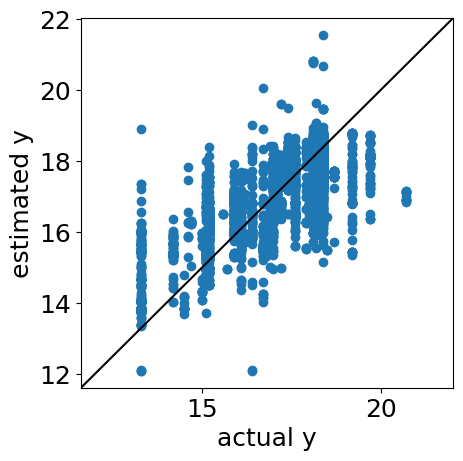

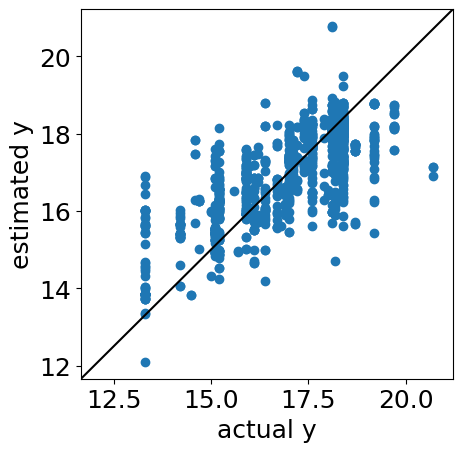

R2 : 訓練 0.5709600896523719, 検証 0.5754733235033469
MAE : 訓練 0.7727494682900978, 検証 0.7562549587297195
RMSE) : 訓練 1.0418720702734006, 検証 1.0212709584078952


,標準回帰係数
Al / Si,-0.012156
Na / Si,-0.023000
F / Si,-0.076991
H2O / Si,0.067837
sda1 / Si,0.026931
...,...
fr_Ndealkylation2,-0.031263
fr_bicyclic,0.045137
fr_piperdine,-0.065579
fr_quatN,0.357521


In [9]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# OLSの実行
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_ols = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_ols)
                      
標準回帰係数_ols.to_csv('標準回帰係数_ols_rdkit_delete.csv')

# PLS

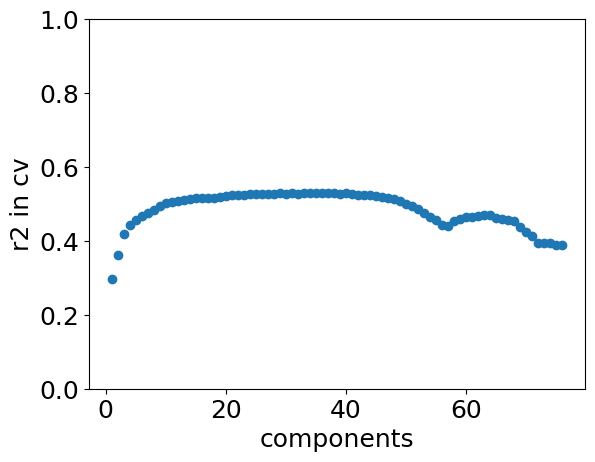

最適な成分数 : 34


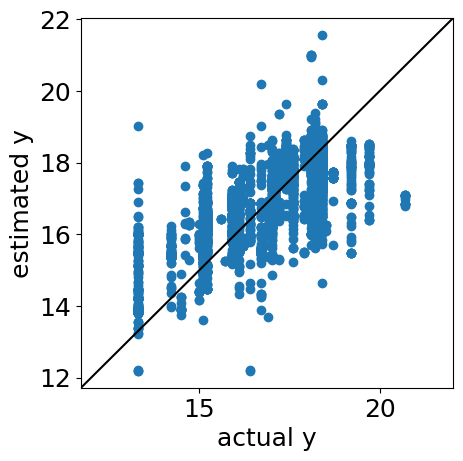

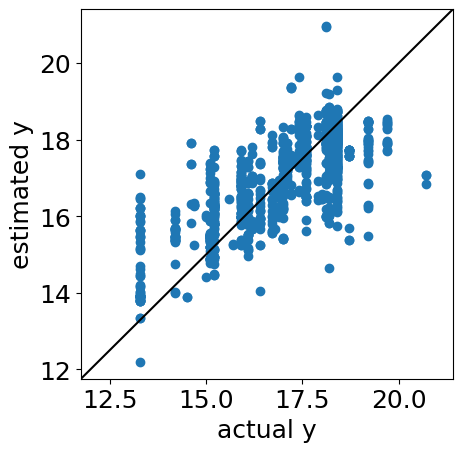

R2 : 訓練 0.55891625516113, 検証 0.5654014460542978
MAE : 訓練 0.7882510394530147, 検証 0.7726960771103816
RMSE) : 訓練 1.056394364915506, 検証 1.0333147477051008


,標準回帰係数
Al / Si,-0.010904
Na / Si,-0.030429
F / Si,-0.081601
H2O / Si,0.069696
sda1 / Si,0.024605
...,...
fr_Ndealkylation2,-0.026293
fr_bicyclic,0.006227
fr_piperdine,-0.116262
fr_quatN,0.300840


In [10]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# PLSの実行
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import numpy as np

max_number_of_components=x.columns.shape[0]
components=np.arange(1, max_number_of_components+1)
all_components=[]
r2_in_cv_all=[]

for component in components:
    model=PLSRegression(n_components=component)
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, autoscaled_y_train, cv=5)
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    all_components.append(component)
    r2_in_cv_all.append(r2_in_cv)

import matplotlib.pyplot as plt
plt.scatter(all_components, r2_in_cv_all)
plt.xlabel('components')
plt.ylabel('r2 in cv')
plt.ylim(0, 1)
plt.show()

optimal_component=all_components[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適な成分数 : {optimal_component}")
model=PLSRegression(n_components=optimal_component)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_pls = pd.DataFrame(model.coef_.T, index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_pls)

標準回帰係数_pls.to_csv('標準回帰係数_pls_rdkit_delete.csv')

# DT

最適な深さ: 46
最適な最小サンプル数: 4


,importance
Al / Si,0.379237
Na / Si,0.038837
F / Si,0.001642
H2O / Si,0.027969
sda1 / Si,0.039096
...,...
fr_Ndealkylation2,0.000000
fr_bicyclic,0.004992
fr_piperdine,0.000000
fr_quatN,0.000000


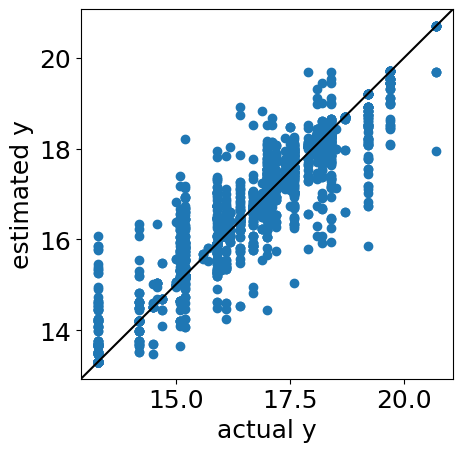

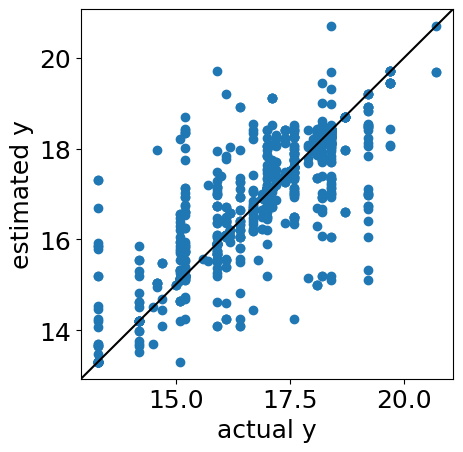

R2 : 訓練 0.9124665298702567, 検証 0.7382630954226848
MAE : 訓練 0.2244451204672717, 検証 0.3992631205673805
RMSE) : 訓練 0.47060075784137223, 検証 0.8019013973976231


In [11]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

#DTの実行
from sklearn.tree import DecisionTreeRegressor
import numpy as np
max_depths=np.arange(1, 51, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeRegressor()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=5)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeRegressor(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit_delete.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# RF

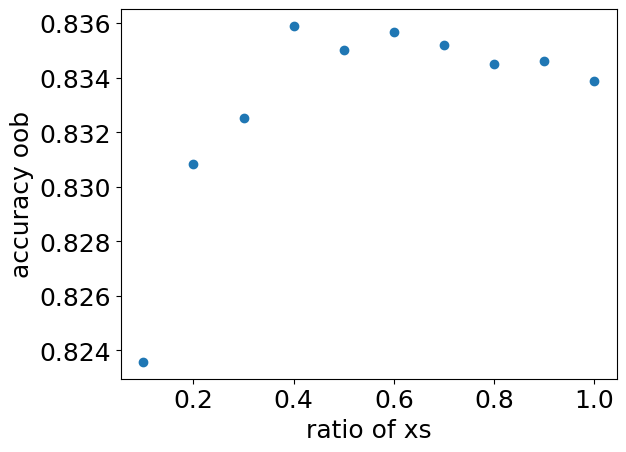

最適なx: 0.4


,importance
Al / Si,0.203674
Na / Si,0.036603
F / Si,0.002441
H2O / Si,0.060859
sda1 / Si,0.033175
...,...
fr_Ndealkylation2,0.000328
fr_bicyclic,0.000685
fr_piperdine,0.000558
fr_quatN,0.000766


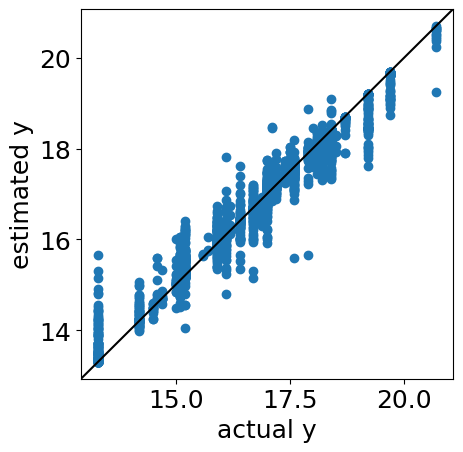

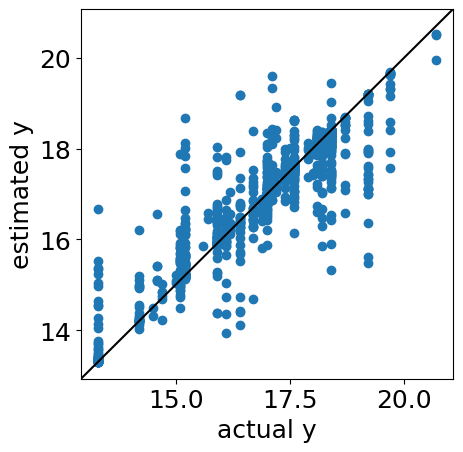

R2 : 訓練 0.9714049262806511, 検証 0.8350447135417497
MAE : 訓練 0.13157097986240487, 検証 0.32400013868939276
RMSE) : 訓練 0.26897453141798683, 検証 0.6366072913164219


In [12]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# RFの実行
from sklearn.ensemble import RandomForestRegressor
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
r2_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestRegressor(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=99)
    model_oob.fit(x_train, y_train)
    r2_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=18
plt.scatter(ratio_of_xs, r2_oob)
plt.xlabel('ratio of xs')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[r2_oob.index(max(r2_oob))]
print(f"最適なx: {optimal_x}")

model=RandomForestRegressor(n_estimators=500, max_features=optimal_x, oob_score=True, random_state=99)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit_RF_delete.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# k-NN

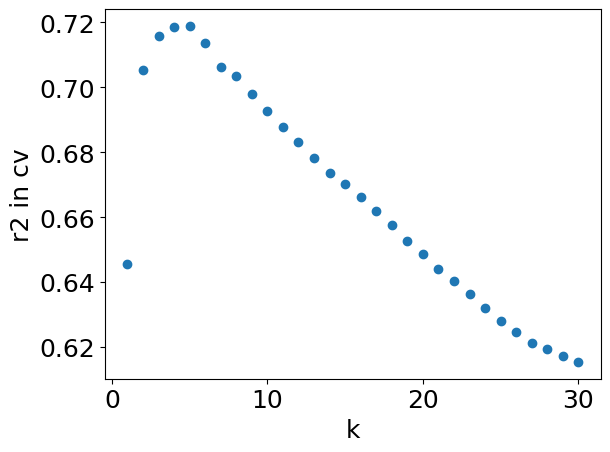

最適なk: 5


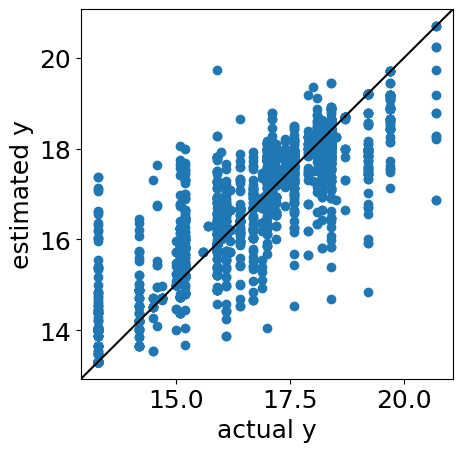

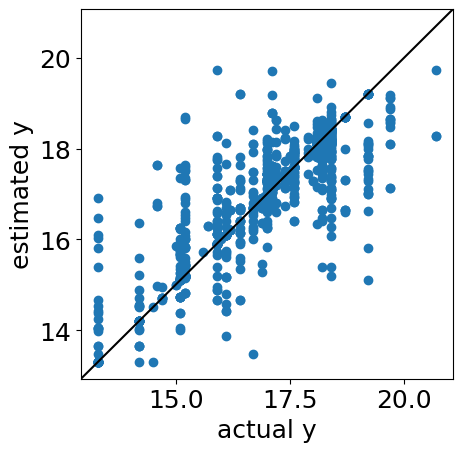

R2 : 訓練 0.8289300149315152, 検証 0.7595286963655404
MAE : 訓練 0.342663259511641, 検証 0.4142978723404254
RMSE) : 訓練 0.6578887471558535, 検証 0.7686349325749304


In [13]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# k-NNの実行
from sklearn.neighbors import KNeighborsRegressor
ks=np.arange(1, 31, 1)
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
all_ks=[]
r2_in_cv_all=[]
for k in ks:
    model_for_cross_validation=KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=pd.DataFrame(cross_val_predict(model_for_cross_validation, autoscaled_x_train, autoscaled_y_train, cv=5))
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    r2_in_cv_all.append(r2_in_cv)
    all_ks.append(k)
import matplotlib.pyplot as plt
plt.scatter(all_ks, r2_in_cv_all)
plt.xlabel('k')
plt.ylabel('r2 in cv')
plt.show()

optimal_k=all_ks[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適なk: {optimal_k}")

model=KNeighborsRegressor(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# XGB

,importance
Al / Si,0.011362
Na / Si,0.002339
F / Si,0.000730
H2O / Si,0.004730
sda1 / Si,0.001969
...,...
fr_Ndealkylation2,0.006939
fr_bicyclic,0.011784
fr_piperdine,0.001467
fr_quatN,0.000000


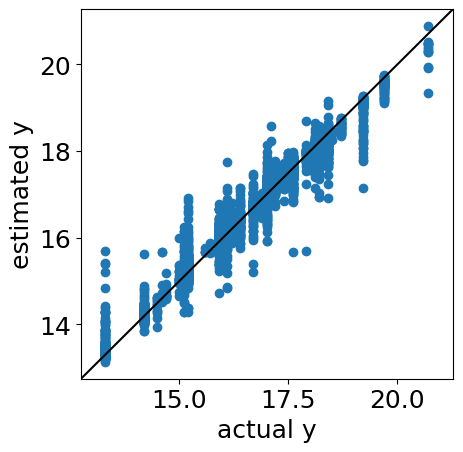

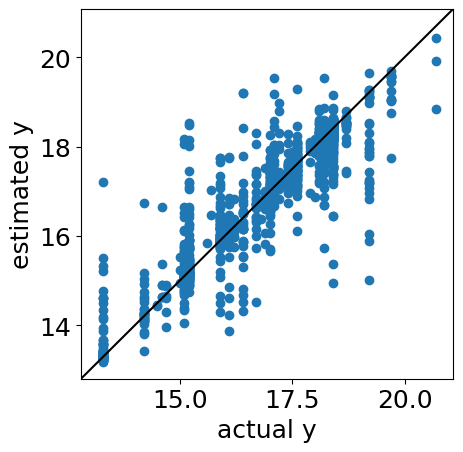

R2 : 訓練 0.9698381659695353, 検証 0.8206545777797254
MAE : 訓練 0.1608373182189524, 検証 0.3717059162221055
RMSE) : 訓練 0.27624499757124726, 検証 0.6637944809935364


In [14]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# XGBの実行
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit_xgb_delete.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# LGBM

,importance
Al / Si,13690.833266
Na / Si,1155.177395
F / Si,19.333166
H2O / Si,2378.490578
sda1 / Si,1099.610931
...,...
fr_Ndealkylation2,6.517906
fr_bicyclic,19.338427
fr_piperdine,2.391390
fr_quatN,0.000000


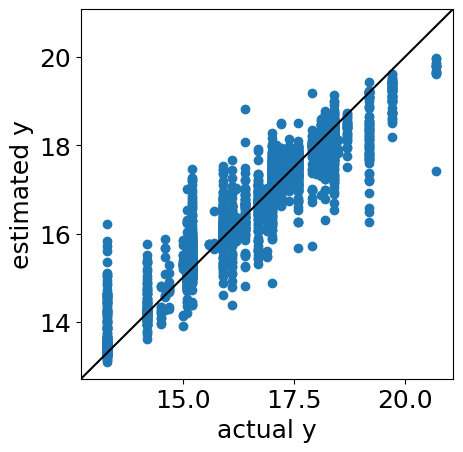

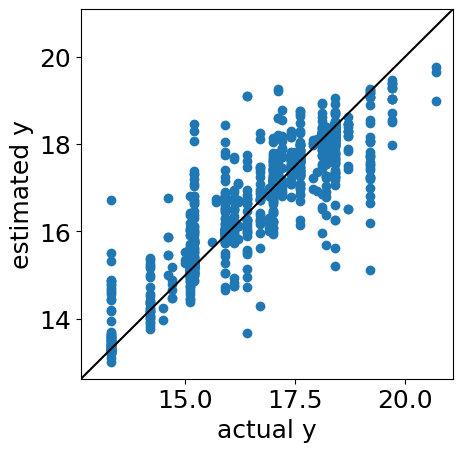

R2 : 訓練 0.912788322401921, 検証 0.8069173174077683
MAE : 訓練 0.2908892896898273, 検証 0.4179046331993565
RMSE) : 訓練 0.46973494477924393, 検証 0.6887476837558092


In [15]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# LGBMの実行
import lightgbm as lgbm
model=lgbm.LGBMRegressor(importance_type = "gain")
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit_lgbm_delete.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# SVM (nonlinear)

最適なC: 32.0
最適なgamma: 0.5
最適なepsilon: 0.25


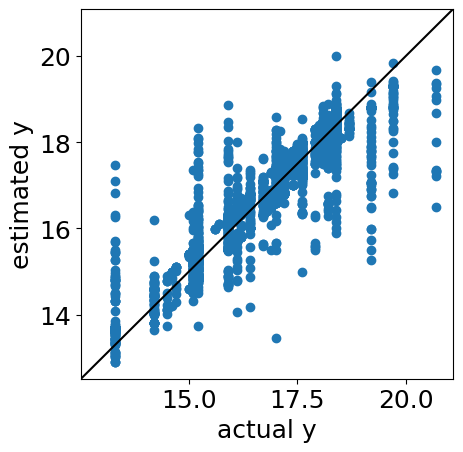

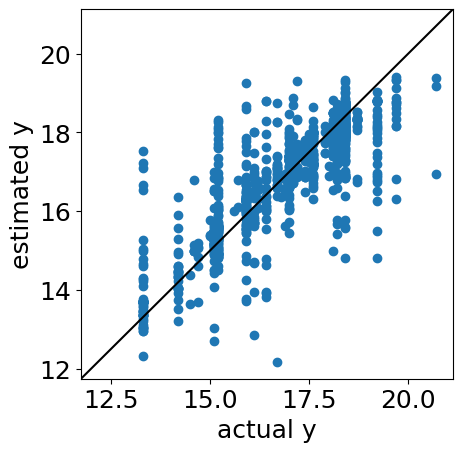

R2 : 訓練 0.8584139588860151, 検証 0.7049632287336083
MAE : 訓練 0.41331598457165564, 検証 0.5594180641365698
RMSE : 訓練 0.5985160053125137, 検証 0.8513861140998095


In [16]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# SVM(nonlinear)の実行
from sklearn.svm import SVR
import numpy as np
nonlinear_svr_cs=2**np.arange(-5, 11, 1.0)
nonlinear_svr_gammas=2**np.arange(-10, 1, 1.0)
nonlinear_svr_epsilons=2**np.arange(-20, 11, 1.0)
# gammaの最適化
from scipy.spatial.distance import cdist
square_of_euclidean_distance = cdist(autoscaled_x_train, autoscaled_x_train, metric='sqeuclidean')
variance_of_gram_matrix = []
for nonlinear_svr_gamma in nonlinear_svr_gammas:
    gram_matrix = np.exp(- nonlinear_svr_gamma * square_of_euclidean_distance)
    variance_of_gram_matrix.append(gram_matrix.var(ddof=1))
optimal_nonlinear_svr_gamma = nonlinear_svr_gammas[variance_of_gram_matrix.index(max(variance_of_gram_matrix))]
# クロスバリデーションの設定
from sklearn.model_selection import KFold
fold = KFold(n_splits=5, shuffle=True, random_state=9)
from sklearn.model_selection import GridSearchCV
# epsilonの最適化
model_for_cross_validation=SVR(kernel='rbf', C=3, gamma=optimal_nonlinear_svr_gamma)
gs_cv=GridSearchCV(model_for_cross_validation, {'epsilon':nonlinear_svr_epsilons}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_epsilon=gs_cv.best_params_['epsilon']
# Cの最適化
model_for_cross_validation=SVR(kernel='rbf', epsilon=optimal_nonlinear_svr_epsilon, gamma=optimal_nonlinear_svr_gamma)
gs_cv=GridSearchCV(model_for_cross_validation, {'C':nonlinear_svr_cs}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_c=gs_cv.best_params_['C']
# gammaの最適化
model_for_cross_validation=SVR(kernel='rbf', epsilon=optimal_nonlinear_svr_epsilon, C=optimal_nonlinear_svr_c)
gs_cv=GridSearchCV(model_for_cross_validation, {'gamma':nonlinear_svr_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_gamma=gs_cv.best_params_['gamma']

print(f"最適なC: {optimal_nonlinear_svr_c}")
print(f"最適なgamma: {optimal_nonlinear_svr_gamma}")
print(f"最適なepsilon: {optimal_nonlinear_svr_epsilon}")

model=SVR(kernel='rbf',C=optimal_nonlinear_svr_c, gamma=optimal_nonlinear_svr_gamma, epsilon=optimal_nonlinear_svr_epsilon)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# RR

最適なlambda: 8.0


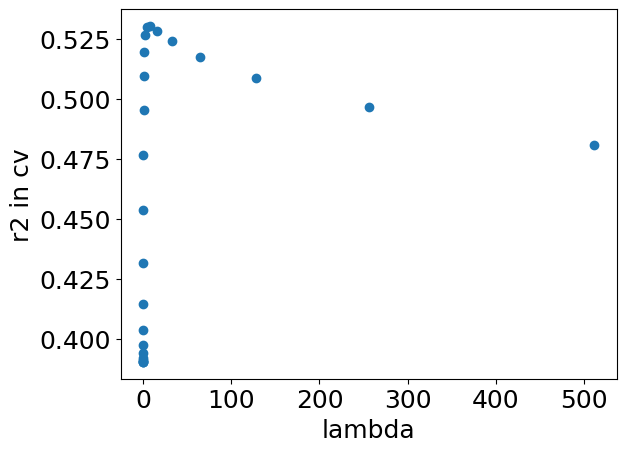

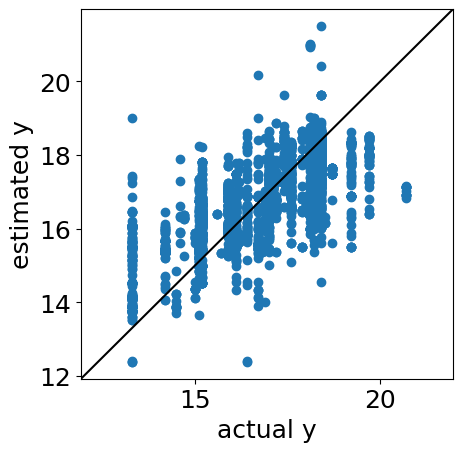

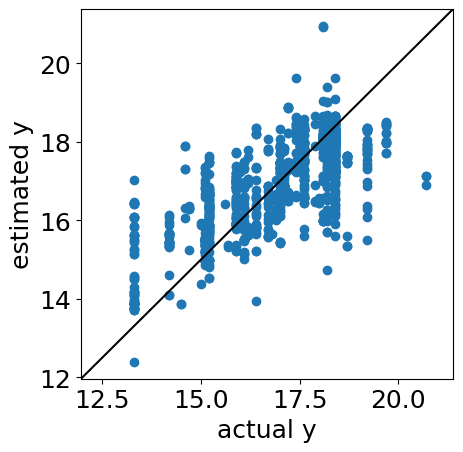

R2 : 訓練 0.5575779174555888, 検証 0.5658298271598945
MAE : 訓練 0.7920573389111553, 検証 0.7743296792813
RMSE) : 訓練 1.0579958086350052, 検証 1.0328053561714827


,標準回帰係数
Al / Si,-0.011394
Na / Si,-0.024264
F / Si,-0.078825
H2O / Si,0.069636
sda1 / Si,0.020347
...,...
fr_Ndealkylation2,-0.025448
fr_bicyclic,-0.001737
fr_piperdine,-0.084520
fr_quatN,0.269233


In [17]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_new.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 82]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

## RRの実行
from sklearn.linear_model import Ridge
import numpy as np
ridge_lambdas=2**np.arange(-15, 10, 1.0)
from sklearn.model_selection import cross_val_predict
r2_in_cv_all=[]
all_lambdas=[]
from sklearn import metrics
for ridge_lambda in ridge_lambdas:
    model=Ridge(alpha=ridge_lambda)
    estimated_y_in_cv=pd.DataFrame(cross_val_predict(model, autoscaled_x_train, autoscaled_y_train, cv=5))
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    r2_in_cv_all.append(r2_in_cv)
    all_lambdas.append(ridge_lambda)

optimal_ridge_lambda=ridge_lambdas[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適なlambda: {optimal_ridge_lambda}")

import matplotlib.pyplot as plt
plt.scatter(all_lambdas, r2_in_cv_all)
plt.xlabel('lambda')
plt.ylabel('r2 in cv')
plt.show()

model=Ridge(alpha=optimal_ridge_lambda)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_rr = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_rr)
                      
標準回帰係数_rr.to_csv('標準回帰係数_rr_rdkit_delete.csv')

# LASSO